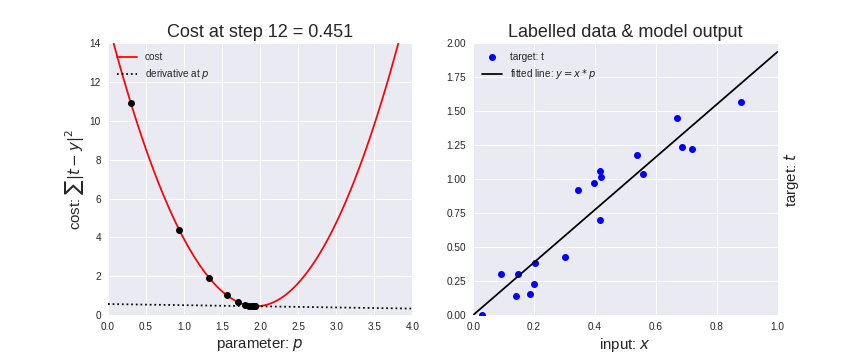

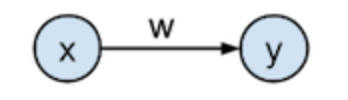

In [1]:
%matplotlib notebook

import sys
import numpy as np  
import matplotlib
import matplotlib.pyplot as plt  
import seaborn as sns  
from matplotlib import cm
from matplotlib.colors import colorConverter, ListedColormap

sns.set_style('darkgrid')
np.random.seed(seed=13)

In [2]:
x = np.random.uniform(0, 1, 20)

def f(x): 
    return x * 2

noise_variance = 0.2  
noise = np.random.randn(x.shape[0]) * noise_variance
t = f(x) + noise

<IPython.core.display.Javascript object>


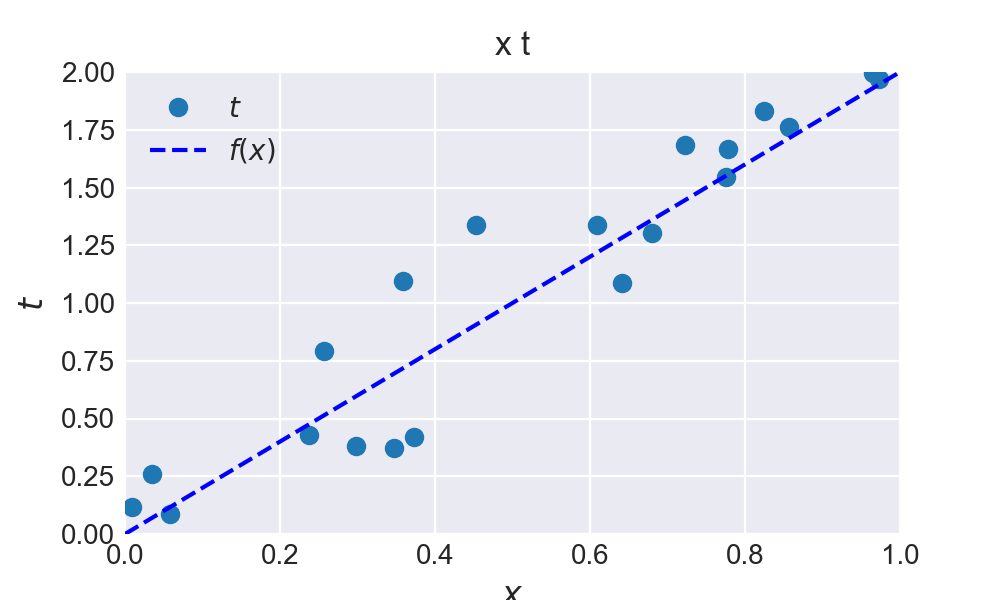

In [3]:
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('x t')
plt.legend(loc=2)
plt.show()

$\mathbf{y} = \mathbf{x} * w$ 

$\xi = \frac{1}{N} \sum_{i=1}^{N} \Vert t_i - y_i \Vert ^2$  


$\underset{w}{\text{argmin}} \frac{1}{N} \sum_{i=1}^{N} \Vert t_i - y_i \Vert^2$.   

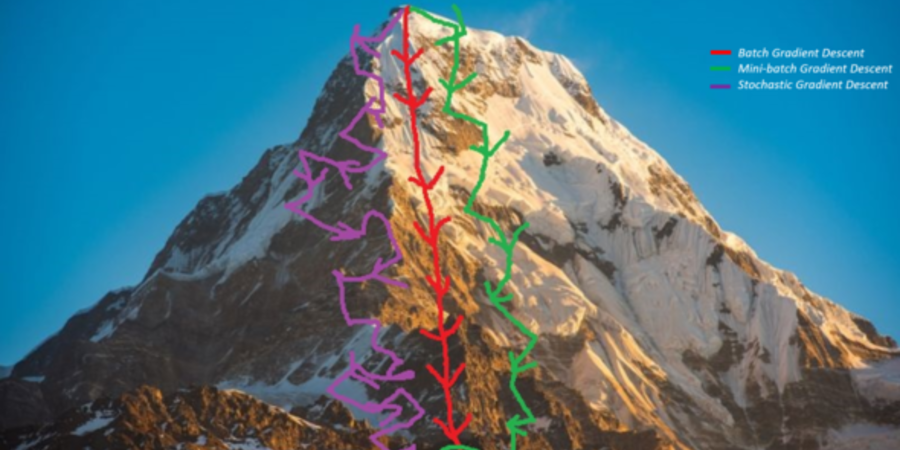

In [4]:
def nn(x, w):
    return x * w


def loss(y, t):
    return np.mean((t - y)**2)

<IPython.core.display.Javascript object>


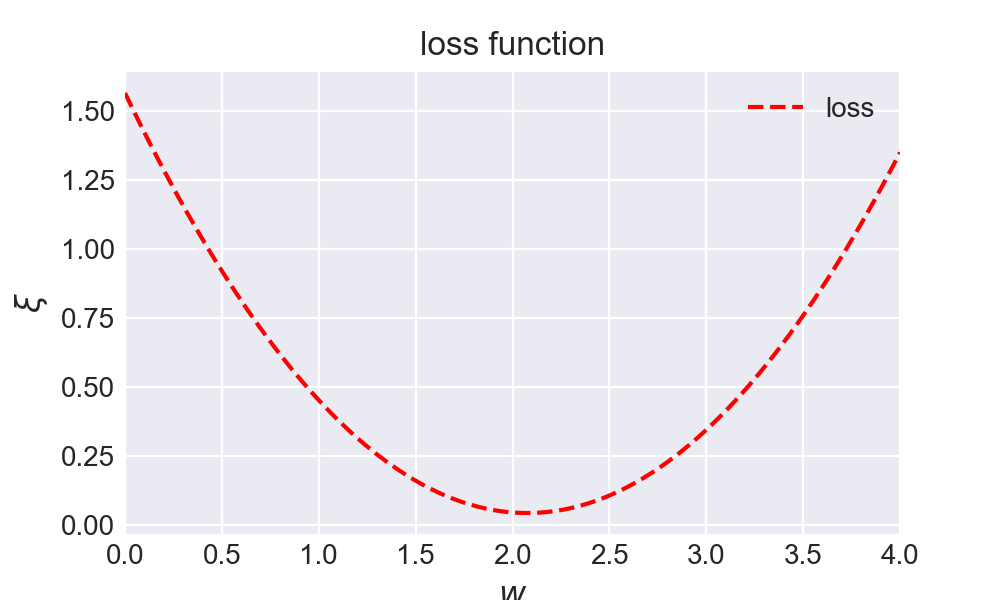

In [5]:
ws = np.linspace(0, 4, num=100)  
loss_ws = np.vectorize(lambda w: loss(nn(x, w) , t))(ws)

plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('loss function')
plt.xlim(0, 4)
plt.legend()
plt.show()

$$
w(k+1) = w(k) - \Delta w(k)
$$

$$
\Delta w = \mu \frac{\partial \xi}{\partial w}
$$


$$
\frac{\partial \xi_i}{\partial w} = \frac{\partial \xi_i}{\partial y_i} \frac{\partial y_i}{\partial w}
$$


$$
\frac{\partial \xi_i}{\partial y_i} = \frac{\partial (t_i - y_i)^2}{\partial y_i} = - 2 (t_i - y_i) = 2 (y_i - t_i)
$$


$$
\frac{\partial y_i}{\partial w} = \frac{\partial (x_i \cdot w)}{\partial w} = x_i
$$


$$
\Delta w = \mu \cdot \frac{\partial \xi_i}{\partial w} = \mu \cdot 2 x_i (y_i - t_i)
$$


$$
\Delta w = \mu * 2 * \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - t_i)
$$

In [6]:
def gradient(w, x, t):
    """y = nn(x, w) = x * w)"""
    return 2 * x * (nn(x, w) - t)


def delta_w(w_k, x, t, learning_rate):
    return learning_rate * np.mean(gradient(w_k, x, t))

w = np.random.rand()
learning_rate = 0.9

nb_of_iterations = 4  
w_loss = [(w, loss(nn(x, w), t))] 
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  
    w = w - dw  
    w_loss.append((w, loss(nn(x, w), t))) 

for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.1380 	 loss: 1.3710
w(1): 1.3722 	 loss: 0.2174
w(2): 1.8205 	 loss: 0.0651
w(3): 1.9834 	 loss: 0.0451
w(4): 2.0426 	 loss: 0.0424


<IPython.core.display.Javascript object>


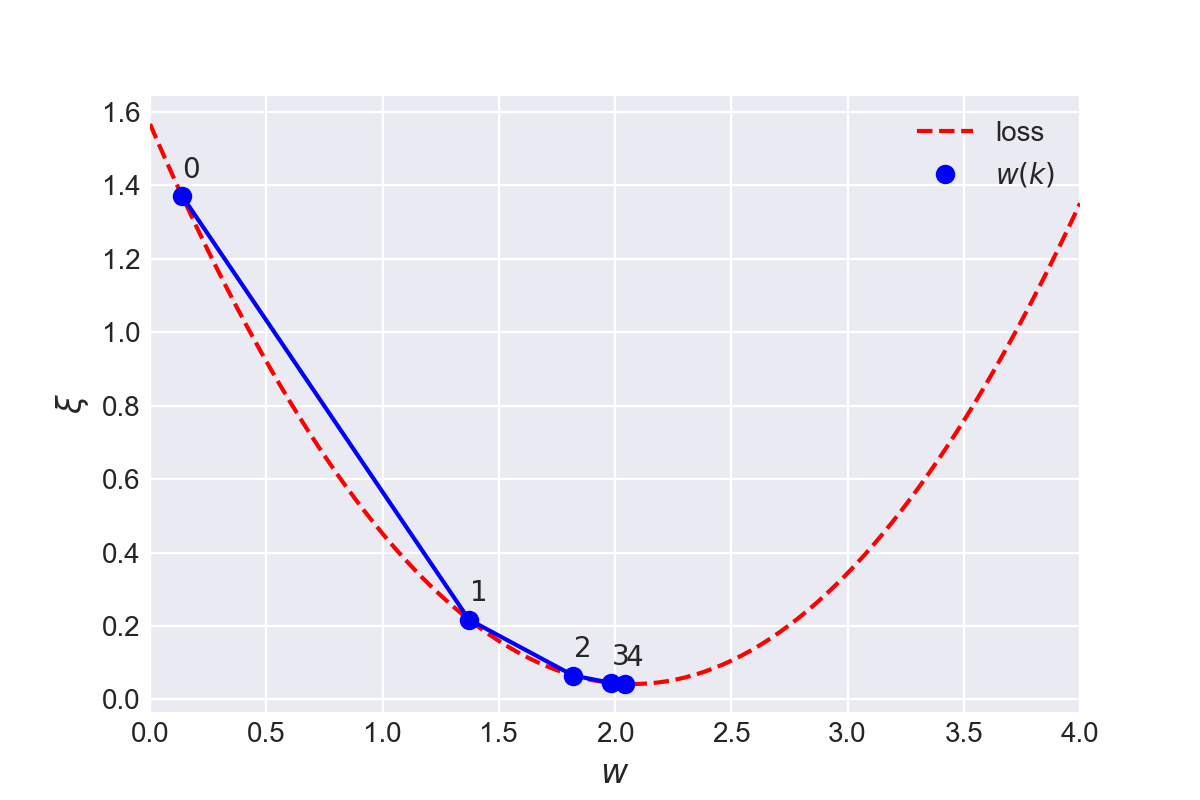

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')  # Loss curve
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()

In [8]:
w = np.random.rand()
nb_of_iterations = 10  
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  
    w = w - dw  

<IPython.core.display.Javascript object>


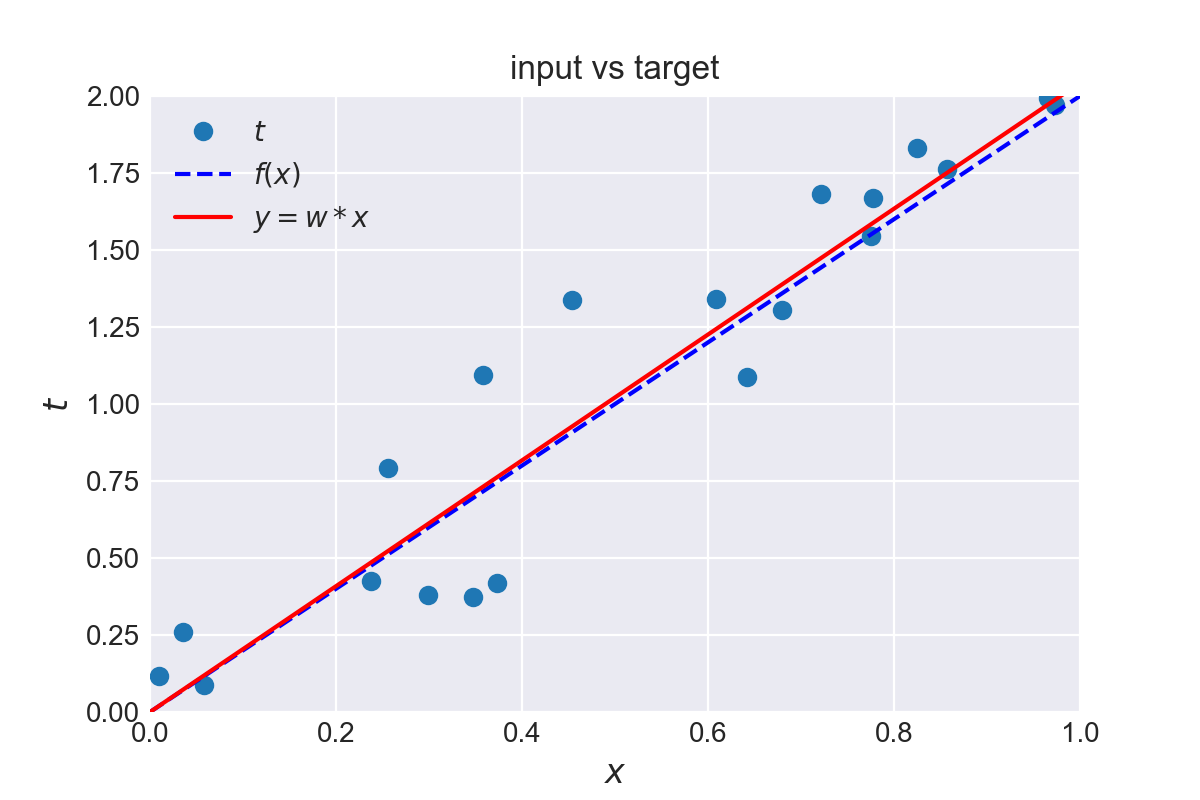

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.plot([0, 1], [0*w, 1*w], 'r-', label='$y = w * x$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('input vs target')
plt.legend(loc=2)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.show()

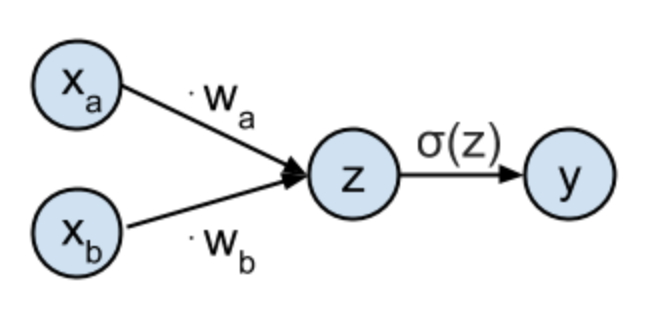

In [11]:
nb_of_samples_per_class = 20  
red_mean = (-1., 0.)  
blue_mean = (1., 0.)  
x_red = np.random.randn(nb_of_samples_per_class, 2) + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2)  + blue_mean

X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class,1)), 
               np.ones((nb_of_samples_per_class,1))))

<IPython.core.display.Javascript object>


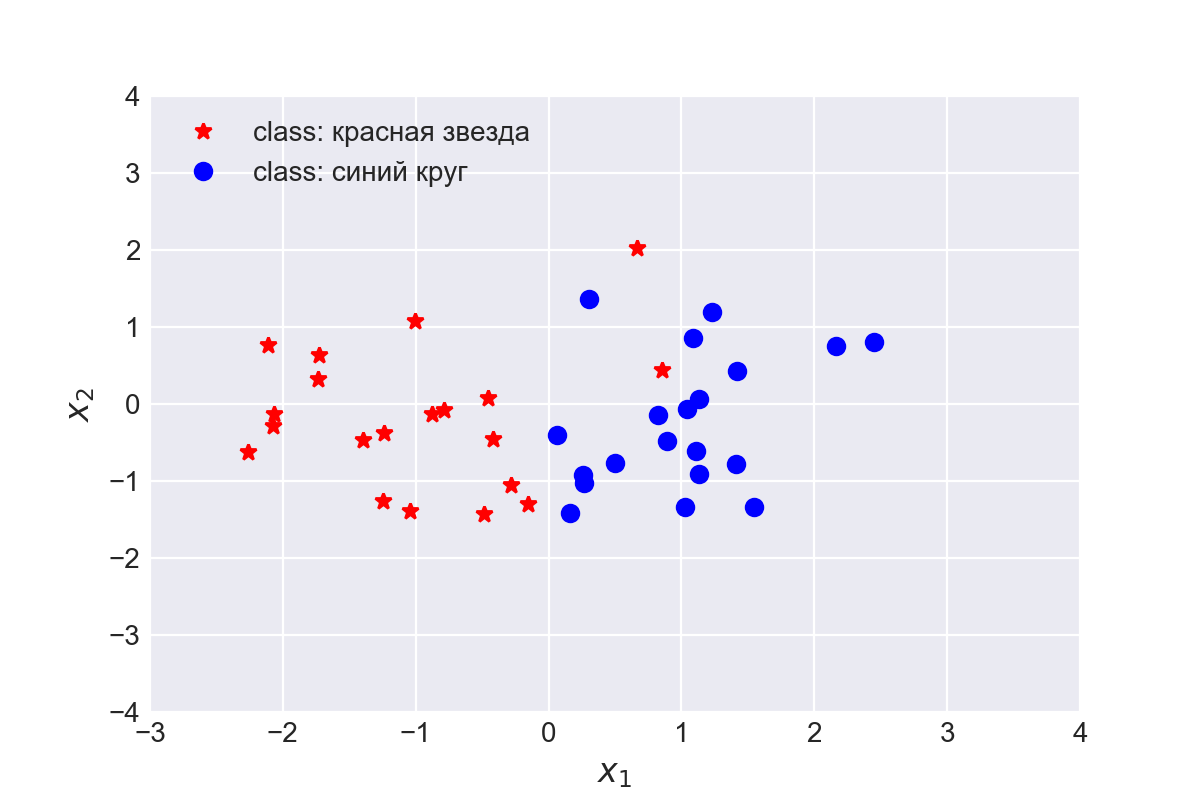

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='class: красная звезда')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class: синий круг')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axis([-3, 4, -4, 4])
plt.show()

$y_i = \sigma(\mathbf{x}_i \cdot \mathbf{w}^T)$


$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

$$ \xi(t_i,y_i) = -t_i log(y_i) - (1-t_i)log(1-y_i) $$

$\xi(t,y) = - \frac{1}{N} \sum_{i=1}^{n} \left[ t_i log(y_i) + (1-t_i)log(1-y_i) \right]$ 

In [14]:
def logistic(z): 
    return 1. / (1 + np.exp(-z))

#y = 1 / (1 + numpy.exp(-x*w))
def nn(x, w): 
    return logistic(x.dot(w.T))

def nn_predict(x,w): 
    return np.around(nn(x,w))
    
def loss(y, t):
    return - np.mean(
        np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))

<IPython.core.display.Javascript object>


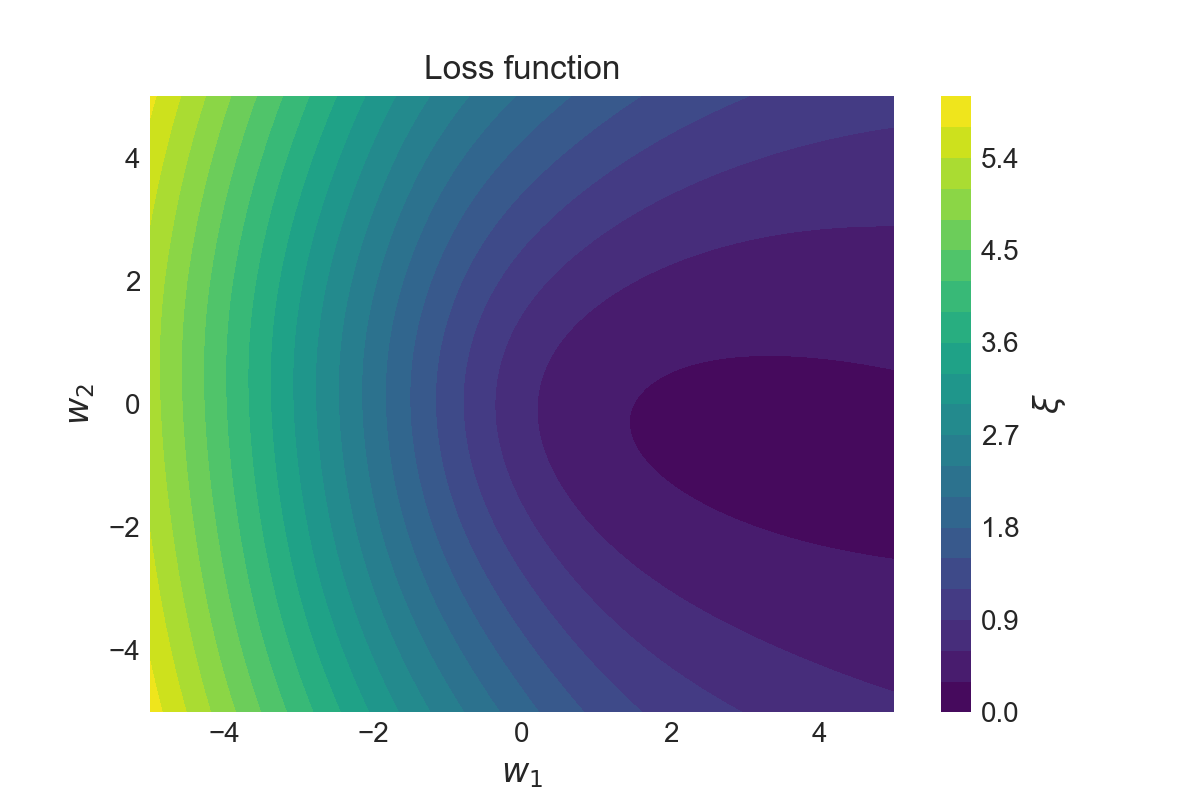

In [15]:
nb_of_ws = 100 
wsa = np.linspace(-5, 5, num=nb_of_ws) 
wsb = np.linspace(-5, 5, num=nb_of_ws) 
ws_x, ws_y = np.meshgrid(wsa, wsb)
loss_ws = np.zeros((nb_of_ws, nb_of_ws)) 
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        loss_ws[i,j] = loss(
            nn(X, np.asmatrix([ws_x[i,j], ws_y[i,j]])) , t)
plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=12)
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Loss function')
plt.grid()
plt.show()

$\mathbf{w}(k+1) = \mathbf{w}(k) - \Delta \mathbf{w}(k+1)$.

$\Delta \mathbf{w} = \mu \frac{\partial \xi}{\partial \mathbf{w}}$

${\partial \xi_i}/{\partial \mathbf{w}}$


$$
\frac{\partial \xi_i}{\partial \mathbf{w}} = \frac{\partial \xi_i}{\partial y_i} \frac{\partial y_i}{\partial z_i} \frac{\partial z_i}{\partial \mathbf{w}}
$$


$$
\frac{\partial \xi_i}{\partial y_i} = \frac{y_i - t_i}{y_i (1 - y_i)}
$$


$$
\frac{\partial y_i}{\partial z_i} = y_i (1 - y_i)
$$


$$
\frac{\partial z_i}{\partial \mathbf{w}} = \frac{\partial (\mathbf{x}_i \cdot \mathbf{w})}{\partial \mathbf{w}} = \mathbf{x}_i
$$


$$
\frac{\partial \xi_i}{\partial \mathbf{w}} 
= \frac{\partial \xi_i}{\partial y_i} \frac{\partial y_i}{\partial z_i} \frac{\partial z_i}{\partial \mathbf{w}} 
= \mathbf{x}_i \cdot y_i (1 - y_i) \cdot \frac{y_i - t_i}{y_i (1-y_i)} 
= \mathbf{x}_i \cdot (y_i-t_i) 
$$


$$
\Delta \mathbf{w} = \mu \cdot \frac{\partial \xi_i}{\partial \mathbf{w}} = \mu \cdot \mathbf{x}_i \cdot (y_i - t_i)
$$


$$\Delta \mathbf{w} = \mu \cdot \frac{1}{N} \sum_{i=1}^{N} \mathbf{x}_i (y_i - t_i)$$

In [16]:
def gradient(w, x, t):
    return (nn(x, w) - t).T * x

 
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t)

In [17]:
w = np.asmatrix([-4, -2])  
learning_rate = 0.05

nb_of_iterations = 10  
w_iter = [w]  
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate)  
    w = w - dw  
    w_iter.append(w)

<IPython.core.display.Javascript object>


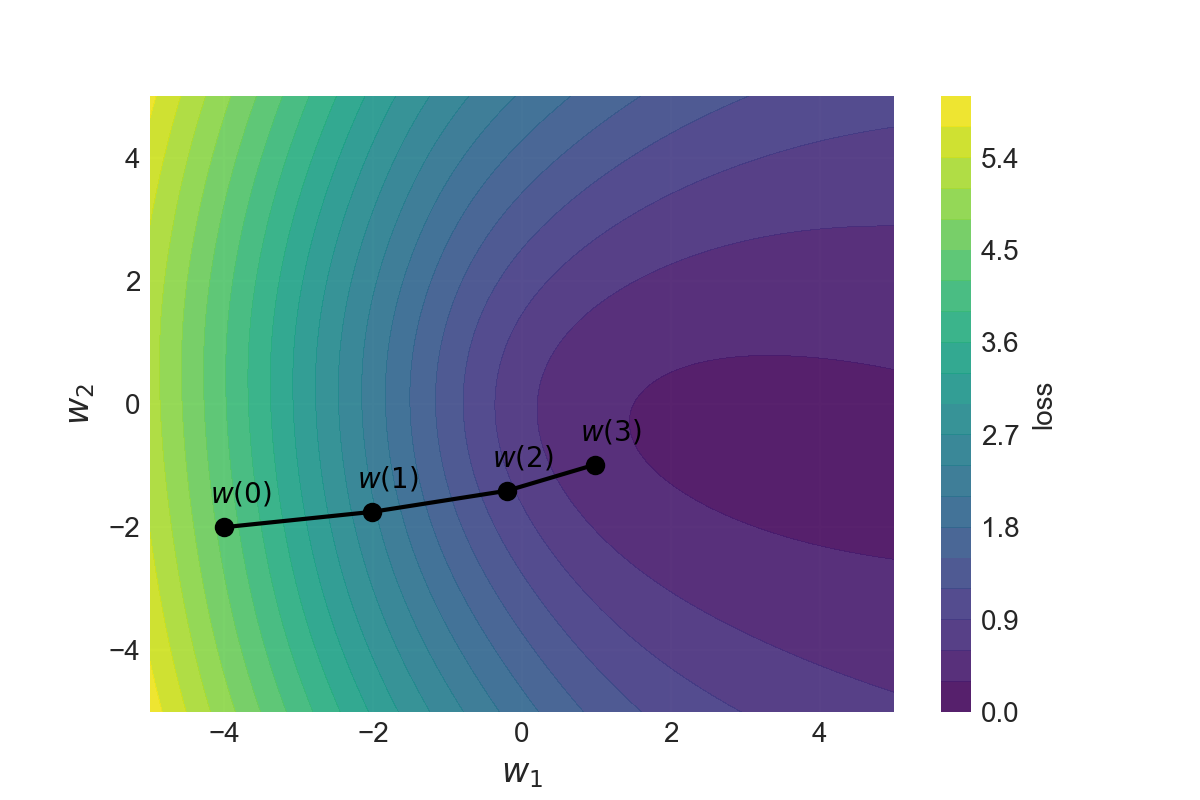

In [18]:
plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, alpha=0.9, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

for i in range(1, 4): 
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    plt.plot(w1[0,0], w1[0,1], 'ko')  
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'k-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i-1})$', color='k')
w1 = w_iter[3]  
plt.plot(w1[0,0], w1[0,1], 'ko')
plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i})$', color='k') 
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


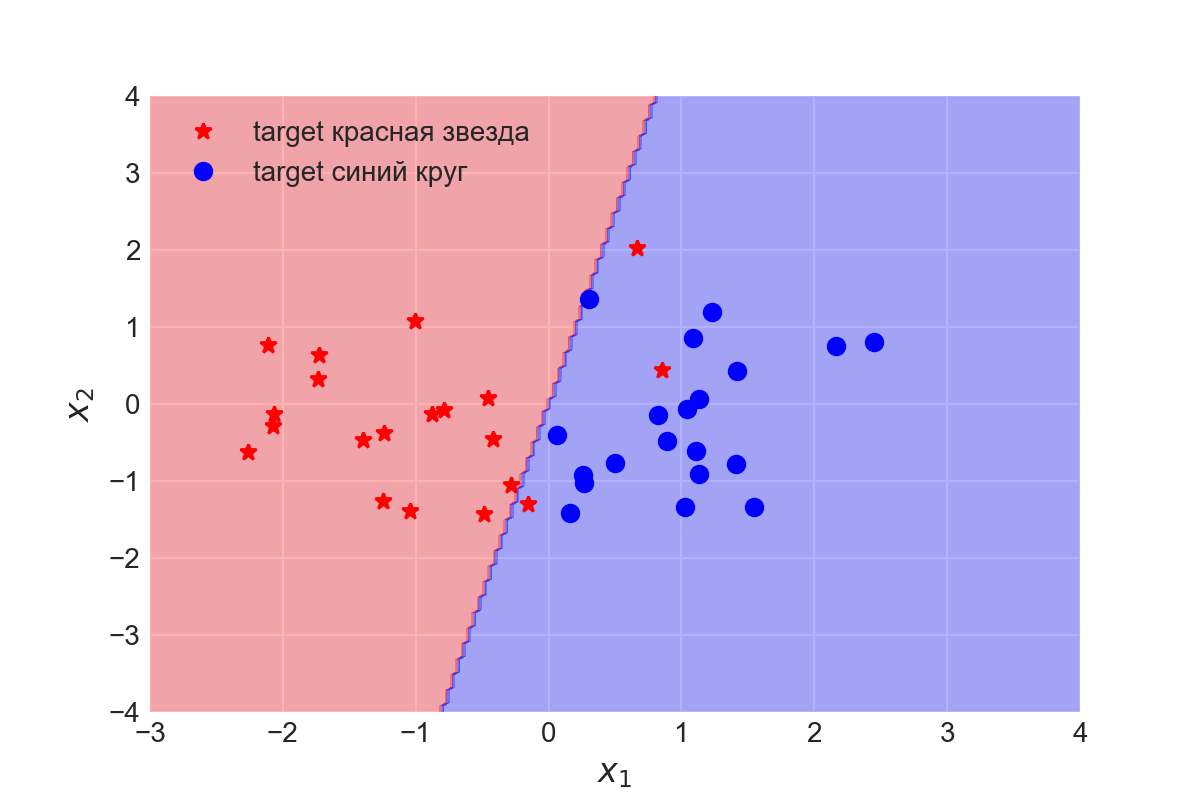

In [20]:
plt.figure(figsize=(6, 4))

nb_of_xs = 200
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb) 
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(
            np.asmatrix([xx[i,j], yy[i,j]]) , w)
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.3),
        colorConverter.to_rgba('b', alpha=0.3)])

plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='target красная звезда')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='target синий круг')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axis([-3, 4, -4, 4])
plt.show()